<a href="https://colab.research.google.com/github/vinitakondhalkar/PythonHackathon/blob/main/PythonHackathon_vinita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#cd '/content/drive/MyDrive/datasets' #after connecting to drive and change file path
import os
os.chdir('/content/drive/MyDrive/PythonHackathon')

In [42]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install sqlalchemy
!pip install pandasql
import pandasql as ps
!pip install fugue[sql]
from fugue_sql import fsql
!pip install duckdb
import duckdb
from datetime import datetime as dt
%matplotlib inline



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
filePath={
    "Patients":"Patients.csv",
    "EDVisits":"EDVisits.csv",
    "AmbulatoryVisits":"AmbulatoryVisits.csv",
    "ReAdmissionRegistry":"ReAdmissionRegistry.csv",
    "Discharges":"Discharges.csv",
    "Providers":"Providers.csv",
    "EDUnique":"EDUnique.csv"
}

In [44]:
Patients=pd.read_csv(filePath['Patients'])
EDVisits=pd.read_csv(filePath['EDVisits'])
AmbulatoryVisits=pd.read_csv(filePath['AmbulatoryVisits'])
ReAdmissionRegistry=pd.read_csv(filePath['ReAdmissionRegistry'])
Discharges=pd.read_csv(filePath['Discharges'])
Providers=pd.read_csv(filePath['Providers'])
EDUnique=pd.read_csv(filePath['EDUnique'])


**12.Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T**

In [53]:
# IMPORT THE SQALCHEMY LIBRARY's CREATE_ENGINE METHOD
from sqlalchemy import create_engine

# DEFINE THE DATABASE CREDENTIALS
user = 'root'
password = 'postgres'
host = '127.0.0.1'
port = 5432
database = 'postgres'

# PYTHON FUNCTION TO CONNECT TO THE POSTGRESQL DATABASE AND
# RETURN THE SQLACHEMY ENGINE OBJECT
def get_connection():
	return create_engine(
		url="postgresql://{0}:{1}@{2}:{3}/{4}".format(
			user, password, host, port, database
		)
	)


if __name__ == '__main__':

	try:
		# GET THE CONNECTION OBJECT (ENGINE) FOR THE DATABASE
		engine = get_connection()
		print(
			f"Connection to the {host} for user {user} created successfully.")
	except Exception as ex:
		print("Connection could not be made due to the following error: \n", ex)



Connection to the 127.0.0.1 for user root created successfully.


In [31]:
#SOLUTION 1
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
mysql("SELECT * FROM Providers where ProviderName like 'T%'")

#SOLUTION 2
#Providers[Providers['ProviderName'].str.startswith("T")]



,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,4,Ted Texas,Pediatrics,12/23/1993
1,8,Ted Green,Pediatrics,5/30/1996
2,9,Ted Black,Pediatrics,2/20/1997
3,19,Tyler Conner,Cardiology,7/9/2003
4,34,Tony Creed,PrimaryCare,4/28/2010
5,37,Trent Tye,PrimaryCare,1/12/2013



**13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x  with 2 rows & 2 columns with object oriented**




<Figure size 432x288 with 0 Axes>

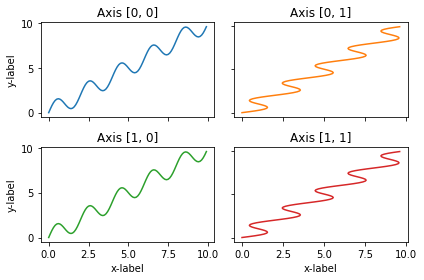

In [ ]:
#SOLUTION 1 
#When stacking in two directions, the returned axs is a 2D NumPy array. If you have to set parameters for each subplot it's handy to iterate over all subplots in a 2D grid axis.flat:.

import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
# creating a figure object
fig=plt.figure()
fig, axis = plt.subplots(2, 2)
axis[0, 0].plot(x, y)
axis[0, 0].set_title('Axis [0, 0]')
axis[0, 1].plot(y, x, 'tab:orange')
axis[0, 1].set_title('Axis [0, 1]')
axis[1, 0].plot(x, y, 'tab:green')
axis[1, 0].set_title('Axis [1, 0]')
axis[1, 1].plot(y, x, 'tab:red')
axis[1, 1].set_title('Axis [1, 1]')

for ax in axis.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axis.flat:
    ax.label_outer()

plt.tight_layout()


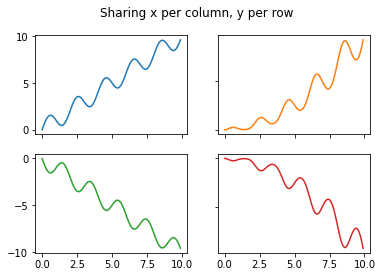

In [ ]:
#SOLUTION 2
#You can use tuple-unpacking also in 2D to assign all subplots to dedicated variables:

import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
# creating a figure object
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

**14.Find the number of null values in BloodPressureSystolic column**

In [ ]:
# Count total missing values in a dataframe , returns an integer value
print("Number of null values in BloodPressureSystolic column :",AmbulatoryVisits['BloodPressureSystolic'].isnull().sum())


Number of null values in BloodPressureSystolic column : 124


**15.Replace all the null values in ReadmissionFlag with 0**

In [ ]:
#SOLUTION 1
ReAdmissionRegistry["ReadmissionFlag"].fillna(0, inplace = True)

#SOLUTION 2
ReAdmissionRegistry["ReadmissionFlag"].replace(to_replace = np.nan, value = 0) 

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

**16.Plot a graph to show the distribution of expected length of stay**

In [ ]:
ReAdmissionRegistry['ExpectedLOS'].min()


2.012973923

In [ ]:
ReAdmissionRegistry['ExpectedLOS'].max()

16.99821319

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


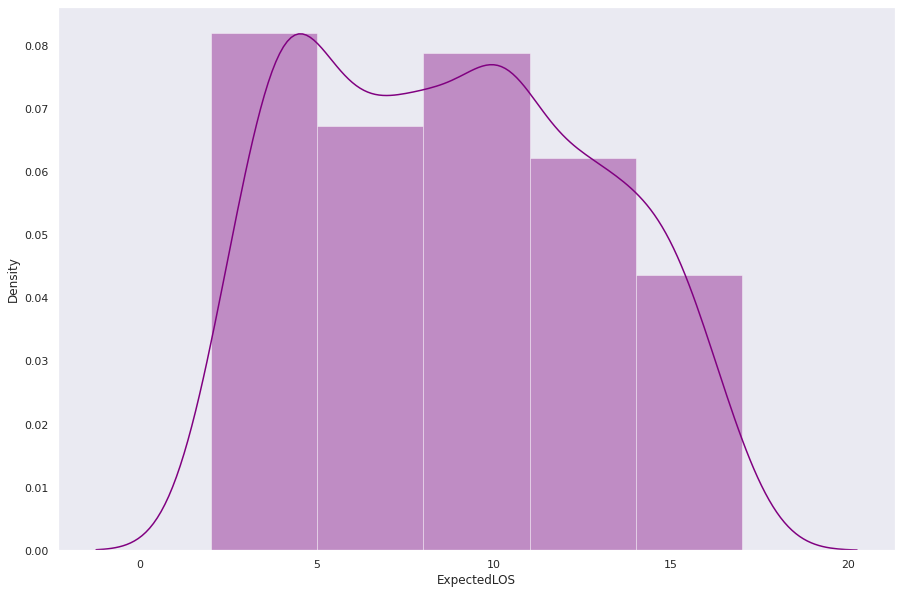

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style='dark',)
plot=sns.distplot(ReAdmissionRegistry['ExpectedLOS'],kde=True,bins=5,color='purple')
plt.show()

**17.Create a heat map to show the correlation between the column values of Edvisits**

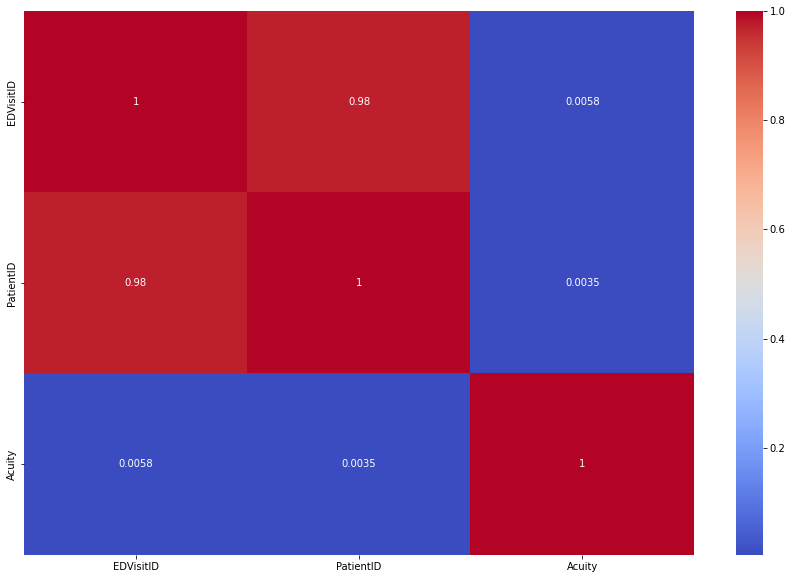

In [ ]:
plt.figure(figsize=(15,10))
ed_corr=EDVisits.corr()
ed_corr
sns.heatmap(ed_corr,annot=True,cmap='coolwarm')

**18.Add column 'Age' in Patient table**

In [ ]:
from datetime import datetime, date
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
Patients['Age'] = Patients['DateOfBirth'].apply(age)
Patients



,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1/1/1960,Male,White,English,62
1,2,Far,Myers,11/15/1985,Male,White,English,36
2,3,Devlin,Michael,4/15/1976,Male,White,English,46
3,4,Carmine,Texas,10/15/1968,Male,White,English,53
4,5,Tann,Bama,5/1/1962,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,5/26/1986,Male,Black/African-American,English,35
941,942,Wandie,Baythrop,6/10/1970,Male,Black/African-American,English,51
942,943,Diahann,Smeeton,1/8/1983,Male,Black/African-American,English,39
943,944,Panchito,Sharple,6/5/1963,Male,Black/African-American,English,58


**19.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet**

In [ ]:

#SOLUTION 1
ReAdmissionRegistry["DischargeDate"] = pd.to_datetime(ReAdmissionRegistry["DischargeDate"])
ReAdmissionRegistry["Date"] = pd.to_datetime(ReAdmissionRegistry["DischargeDate"],format='%Y-%m-%d').dt.date
ReAdmissionRegistry["Time"] = pd.to_datetime(ReAdmissionRegistry["DischargeDate"],format='%H:%M:%S').dt.time
ReAdmissionRegistry[["DischargeDate","Date","Time"]]

#SOLUTION 2
#ReAdmissionRegistry.DischargeDate = pd.to_datetime(ReAdmissionRegistry.DischargeDate)
#ReAdmissionRegistry['Date'] = [dt.date() for dt in ReAdmissionRegistry["DischargeDate"]]
#ReAdmissionRegistry['Time'] = [dt.time() for dt in ReAdmissionRegistry["DischargeDate"]]
#ReAdmissionRegistry[["DischargeDate","Date","Time"]]

#SOLUTION 3
#ReAdmissionRegistry.DischargeDate = pd.to_datetime(ReAdmissionRegistry.DischargeDate)
#ReAdmissionRegistry["Date"] = ReAdmissionRegistry["DischargeDate"].dt.date
#ReAdmissionRegistry["Time"] = ReAdmissionRegistry["DischargeDate"].dt.time
#ReAdmissionRegistry[["DischargeDate","Date","Time"]]




,DischargeDate,Date,Time
0,2018-01-04,2018-01-04,00:00:00
1,2018-01-04,2018-01-04,00:00:00
2,2018-01-04,2018-01-04,00:00:00
3,2018-01-05,2018-01-05,00:00:00
4,2018-01-05,2018-01-05,00:00:00
...,...,...,...
715,2018-03-07,2018-03-07,00:00:00
716,2018-03-08,2018-03-08,00:00:00
717,2018-03-08,2018-03-08,00:00:00
718,2018-03-10,2018-03-10,00:00:00


**20.Count of number of patients admitted based on Primary Diagnosis and Service provided**

In [ ]:
#SOLUTION 1
ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].nunique().to_frame(name = 'Count of Patients Admitted')


Count of Patients
PrimaryDiagnosis   Service                            
AMI                Cardiology                       40
                   Hospitalist                       1
                   ICU                               5
                   Neurology                         2
Afib               Cardiology                       10
                   ICU                               1
Broken Leg         Cardiology                        3
                   General Medicine                  3
                   Hospitalist                       3
Diabetes           General Medicine                 38
                   Hospitalist                      26
Fever              General Medicine                 13
                   Hospitalist                       3
                   ICU                               3
Flu                Cardiology                        2
                   General Medicine                 54
                   Hospitalist                      19
                   ICU                               3
                   Neurology                         2
Heart Failure      Cardiology                       39
                   ICU                              33
                   Neurology                         6
Hip Fracture       Orthopeadics                     23
Hypertension       General Medicine                 34
                   Hospitalist                       6
                   ICU                               4
                   Neurology                         5
Kidney Failure     Cardiology                        1
                   General Medicine                 12
                   Hospitalist                       6
                   ICU                               1
Knee Replacement   Hospitalist                       1
                   Orthopeadics                     22
Laceration         General Medicine                 21
                   Hospitalist                       7
                   ICU                               1
Migraine           Neurology                        12
Pain               Neurology                         7
Pneumonia          General Medicine                 67
                   Hospitalist                      28
                   ICU                              77
                   Neurology                         5
Spinal Cord Injury ICU                               2
Stroke             General Medicine                 20
                   Hospitalist                       1
                   ICU                              21
                   Neurology                        26

In [ ]:
#SOLUTION 2
ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].size().to_frame(name = 'Count of Patients Admitted')


Count of Patients
PrimaryDiagnosis   Service                            
AMI                Cardiology                       40
                   Hospitalist                       1
                   ICU                               5
                   Neurology                         2
Afib               Cardiology                       10
                   ICU                               1
Broken Leg         Cardiology                        3
                   General Medicine                  3
                   Hospitalist                       3
Diabetes           General Medicine                 38
                   Hospitalist                      26
Fever              General Medicine                 13
                   Hospitalist                       3
                   ICU                               3
Flu                Cardiology                        2
                   General Medicine                 54
                   Hospitalist                      19
                   ICU                               3
                   Neurology                         2
Heart Failure      Cardiology                       39
                   ICU                              33
                   Neurology                         6
Hip Fracture       Orthopeadics                     23
Hypertension       General Medicine                 35
                   Hospitalist                       6
                   ICU                               4
                   Neurology                         5
Kidney Failure     Cardiology                        1
                   General Medicine                 12
                   Hospitalist                       6
                   ICU                               1
Knee Replacement   Hospitalist                       1
                   Orthopeadics                     22
Laceration         General Medicine                 21
                   Hospitalist                       7
                   ICU                               1
Migraine           Neurology                        12
Pain               Neurology                         7
Pneumonia          General Medicine                 67
                   Hospitalist                      28
                   ICU                              77
                   Neurology                         5
Spinal Cord Injury ICU                               2
Stroke             General Medicine                 20
                   Hospitalist                       1
                   ICU                              21
                   Neurology                        26

In [ ]:
#SOLUTION 3
ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].count().to_frame(name = 'Count of Patients Admitted')


Count of Patients
PrimaryDiagnosis   Service                            
AMI                Cardiology                       40
                   Hospitalist                       1
                   ICU                               5
                   Neurology                         2
Afib               Cardiology                       10
                   ICU                               1
Broken Leg         Cardiology                        3
                   General Medicine                  3
                   Hospitalist                       3
Diabetes           General Medicine                 38
                   Hospitalist                      26
Fever              General Medicine                 13
                   Hospitalist                       3
                   ICU                               3
Flu                Cardiology                        2
                   General Medicine                 54
                   Hospitalist                      19
                   ICU                               3
                   Neurology                         2
Heart Failure      Cardiology                       39
                   ICU                              33
                   Neurology                         6
Hip Fracture       Orthopeadics                     23
Hypertension       General Medicine                 35
                   Hospitalist                       6
                   ICU                               4
                   Neurology                         5
Kidney Failure     Cardiology                        1
                   General Medicine                 12
                   Hospitalist                       6
                   ICU                               1
Knee Replacement   Hospitalist                       1
                   Orthopeadics                     22
Laceration         General Medicine                 21
                   Hospitalist                       7
                   ICU                               1
Migraine           Neurology                        12
Pain               Neurology                         7
Pneumonia          General Medicine                 67
                   Hospitalist                      28
                   ICU                              77
                   Neurology                         5
Spinal Cord Injury ICU                               2
Stroke             General Medicine                 20
                   Hospitalist                       1
                   ICU                              21
                   Neurology                        26

**21.Which demographic patients are prone to get stroke**

In [ ]:
demographic_patients=Patients.merge(ReAdmissionRegistry[['PatientID', 'PrimaryDiagnosis']])
filtering = demographic_patients['PrimaryDiagnosis'] == "Stroke"
demographic_patients.where(filtering,inplace=True)
df=demographic_patients.groupby(['PrimaryDiagnosis','Race','Language','Gender'])['PatientID'].count()
df.sort_values(ascending=False).head(1).to_frame(name = 'Number of Prone Patients')




,,,,Number of Prone Patients
PrimaryDiagnosis,Race,Language,Gender,
Stroke,Black/African-American,English,Male,18


In [ ]:
demographic_patients=Patients.merge(ReAdmissionRegistry[['PatientID', 'PrimaryDiagnosis']])
filtering = demographic_patients['PrimaryDiagnosis'] == "Stroke"
demographic_patients.where(filtering,inplace=True)
df=demographic_patients.groupby(['PrimaryDiagnosis','Race'])['PatientID'].count().head(1)
df.sort_values(ascending=False).head(1).to_frame(name = 'Number of Prone Patients')

,,Number of Prone Patients
PrimaryDiagnosis,Race,
Stroke,Black/African-American,40


In [ ]:
demographic_patients=Patients.merge(ReAdmissionRegistry[['PatientID', 'PrimaryDiagnosis']])
filtering = demographic_patients['PrimaryDiagnosis'] == "Stroke"
demographic_patients.where(filtering,inplace=True)
df=demographic_patients.groupby(['PrimaryDiagnosis','Language'])['PatientID'].count().head(1)
df.sort_values(ascending=False).head(1).to_frame(name = 'Number of Prone Patients')


,,Number of Prone Patients
PrimaryDiagnosis,Language,
Stroke,English,51


In [ ]:
demographic_patients=Patients.merge(ReAdmissionRegistry[['PatientID', 'PrimaryDiagnosis']])
filtering = demographic_patients['PrimaryDiagnosis'] == "Stroke"
demographic_patients.where(filtering,inplace=True)
df=demographic_patients.groupby(['PrimaryDiagnosis','Gender'])['PatientID'].count().head(1)
df.sort_values(ascending=False).head(1).to_frame(name = 'Number of Prone Patients')

,,Number of Prone Patients
PrimaryDiagnosis,Gender,
Stroke,Female,36


**22.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value**

In [ ]:
EDVisits_new = EDVisits.set_index(['Acuity','EDDisposition'])
#SOLUTION 1
EDVisits_new.groupby(['Acuity','EDDisposition'])['PatientID'].count()
#SOLUTION 2
EDVisits_new.groupby(level=[0,1])["PatientID"].count().to_frame(name = 'Number of Patients')

Number of Patients
Acuity EDDisposition                    
1      Admitted                       32
       Discharged                    558
2      Admitted                      116
       Discharged                     66
3      Admitted                       81
4      Admitted                      107
       Discharged                     30
5      Admitted                      179
       Discharged                     30

**51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.**

In [ ]:
EDVisits=EDVisits[EDVisits['ReasonForVisit'].isin(['Migraine','Pneumonia']) & (EDVisits.Acuity >=2)]
df_inner = pd.merge(Patients, EDVisits, on='PatientID', how='inner')
df_inner

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,3,Devlin,Michael,4/15/1976,Male,White,English,55,3:01:30 PM,11:11:54 PM,3,Migraine,Admitted
1,7,Skipton,Bar,11/25/1975,Male,White,English,98,1:33:47 AM,11:36:20 AM,2,Migraine,Discharged
2,8,Alexandra,Green,6/16/1967,Male,White,English,8,1:15:36 AM,12:07:25 AM,2,Migraine,Discharged
3,10,Granny,Man,9/15/1969,Male,White,English,10,2:02:03 AM,8:28:27 AM,2,Migraine,Discharged
4,12,Zonnya,Ab,5/23/1963,Male,White,Spanish,12,2:45:40 AM,2:00:01 AM,2,Migraine,Admitted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,913,Alta,McGrath,2/9/1973,Female,Black/African-American,English,1167,5:09:23 AM,3:57:13 AM,4,Pneumonia,Admitted
211,915,Jerrilyn,Dyson,1/18/1978,Female,Black/African-American,English,1169,5:30:03 AM,6:47:12 PM,3,Migraine,Admitted
212,916,Kaylil,Baldack,11/17/1966,Female,Black/African-American,English,1170,5:57:30 AM,6:03:51 AM,4,Pneumonia,Admitted
213,917,Velvet,Bushnell,11/13/1965,Female,Black/African-American,English,1171,6:27:24 AM,10:16:04 AM,2,Pneumonia,Admitted


**52.Retrieve the row with minimum DBP using sorting technique**

In [ ]:
#SOLUTION 1 using sorting technique
AmbulatoryVisits.sort_values(by=['BloodPressureDiastolic']).head(1)

#SOLUTION 2 using min function 
#AmbulatoryVisits[AmbulatoryVisits.BloodPressureDiastolic == AmbulatoryVisits.BloodPressureDiastolic.min()]



,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2/8/2019,2/7/2019,7,Follow Up,120.0,51.695653,53.310495,Completed


**53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit**

In [ ]:
reason = input("Enter the Reason For Visit : ").capitalize()
print(reason)
filtering = EDVisits['ReasonForVisit'] == reason 
EDVisits.where(filtering,inplace=True)
EDVisits.groupby("ReasonForVisit")["PatientID"].count().to_frame(name = 'Number of Patients Admitted')



Enter the Reason For Visit : Fever
Fever


,Number of Patients Admitted
ReasonForVisit,
Fever,234


**54.Mortality O.E**

In [ ]:

r_new=ReAdmissionRegistry[ReAdmissionRegistry["DischargeDisposition"]=="Expired"]
observed_mortality=len(r_new)
answer=observed_mortality / ReAdmissionRegistry["ExpectedMortality"].sum()
print("MORTALITY O.E. = ",answer.round(decimals = 2))


MORTALITY O.E. =  0.43


**55.Create a bar chart on service & expected length of stay**

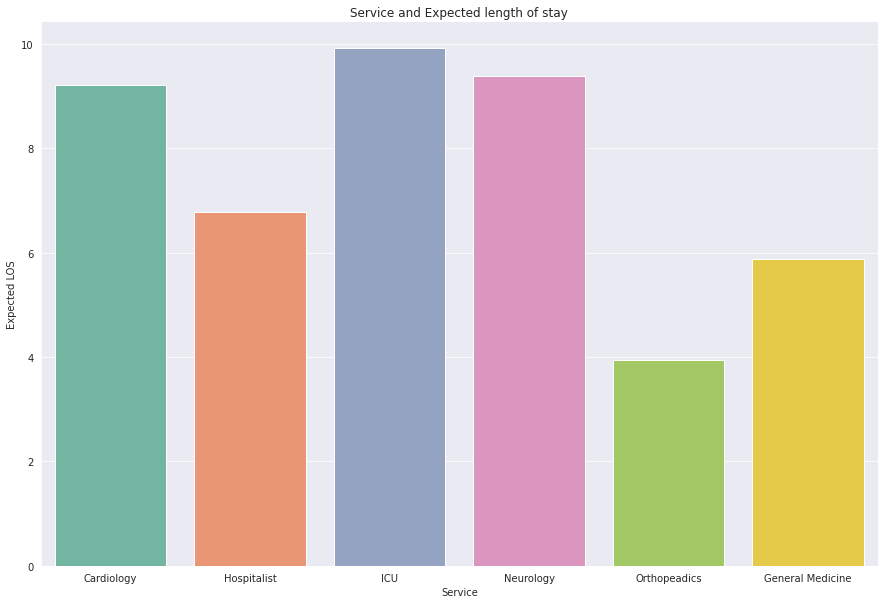

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='Service',y='ExpectedLOS',data=ReAdmissionRegistry,ci=None)
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.title('Service and Expected length of stay')
plt.xlabel('Service')
plt.ylabel('Expected LOS')
sns.despine()
plt.show()


**56.Count of canceled status**

In [ ]:
filtering1 = AmbulatoryVisits['VisitStatus'] == 'Canceled'
AmbulatoryVisits.where(filtering1,inplace=True)
AmbulatoryVisits.groupby(["VisitStatus"])['VisitID'].count().to_frame(name = 'Count of Canceled Visits')

,Count of Canceled Visits
VisitStatus,
Canceled,60


**57.Find the age prone to get stroke**

In [ ]:
from datetime import datetime, date
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))  
Patients['Age'] = Patients['DateOfBirth'].apply(age)
patients_proneage=Patients.merge(ReAdmissionRegistry[['PatientID', 'PrimaryDiagnosis']])

patients_proneage=patients_proneage[patients_proneage['PrimaryDiagnosis']=='Stroke']
patients_proneage.groupby(["PrimaryDiagnosis","Age"])['PatientID'].count().sort_values(ascending=False).head(1).to_frame(name = 'Occurences')


,,Occurences
PrimaryDiagnosis,Age,
Stroke,57,6


**58.Display total count of patients service wise based on gender**

In [ ]:
patients_new=Patients.merge(ReAdmissionRegistry[['PatientID', 'Service']])
patients_new.groupby(['Service','Gender'])['PatientID'].count().to_frame(name = 'Count of Patients')

Count of Patients
Service          Gender                   
Cardiology       Female                 41
                 Male                   54
General Medicine Female                114
                 Male                  149
Hospitalist      Female                 35
                 Male                   66
ICU              Female                 65
                 Male                   86
Neurology        Female                 34
                 Male                   31
Orthopeadics     Female                 22
                 Male                   23

**59.Create a dataframe by splitting provider name to firstname and lastname with names for the columns**

In [ ]:
Providers_new=pd.DataFrame()
Providers_new[['First Name', 'Last Name']] = Providers['ProviderName'].str.split(' ', 1, expand=True)
Providers_new


,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


60.Predict the output of the program..
class Acc: 
def __init__(self, id): 
self.id = id
id = 555 

acc = Acc(111) 
print(acc.id)


**OUTPUT will be 111.**

We are creating an instance of class Acc.
Inside the class we are defining the init function which initialises the attribute id to the value passed in the function as a parameter.
It then initialises the value of the variable id and lastly,prints the value in the putput.

**81.Display full name of patients**


In [ ]:
Patients_fullname = pd.DataFrame()
Patients_fullname['Patient Full Name'] = Patients['FirstName'] + ' ' + Patients['LastName']
Patients_fullname

,Full Name
0,Lanni Sue
1,Far Myers
2,Devlin Michael
3,Carmine Texas
4,Tann Bama
...,...
940,Wat Fideler
941,Wandie Baythrop
942,Diahann Smeeton
943,Panchito Sharple


**82.Retrieve the rows where SBP<140 and DBP<80**

In [ ]:
AmbulatoryVisits[(AmbulatoryVisits.BloodPressureSystolic < 140 ) & (AmbulatoryVisits.BloodPressureDiastolic < 80)]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,3/13/2019,2/28/2019,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,3/16/2019,2/26/2019,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,1/21/2019,1/7/2019,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,3/19/2019,3/3/2019,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,3/20/2019,3/10/2019,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2/22/2019,2/4/2019,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,3/25/2019,2/26/2019,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2/5/2019,1/10/2019,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2/10/2019,2/2/2019,2,Physical,121.0,64.896818,68.496869,Canceled


**43.Write a regular expression to find all the digits and numbers in the string**

In [ ]:
import re
str="We are Team Pythonistas consisting of 4 members . We are participating in Python Hackathon from 05/17/2022 to 05/24/2022 !! We are going to come 1st !"
#search using regex
x = re.findall('[0-9]+', str)
print("All digits and numbers in the string are: ",x)

All digits and numbers in the string are:  ['4', '05', '17', '2022', '05', '24', '2022', '1']


**44.Create a pivot table displaying average LOS based on Service and Primary Diagnosis**

In [ ]:
#convert columns to datetime
ReAdmissionRegistry[["AdmissionDate","DischargeDate"]] = ReAdmissionRegistry[["AdmissionDate","DischargeDate"]].apply(pd.to_datetime)
#calculate difference between dates
ReAdmissionRegistry['Length_of_Stay']=(ReAdmissionRegistry["DischargeDate"] - ReAdmissionRegistry["AdmissionDate"]) / np.timedelta64(1, 'D')
# Creates a pivot table dataframe
pd.pivot_table(ReAdmissionRegistry, index =['Service','PrimaryDiagnosis'], values ='Length_of_Stay',aggfunc = 'mean')


Length_of_Stay
Service          PrimaryDiagnosis                  
Cardiology       AMI                      10.250000
                 Afib                     11.200000
                 Broken Leg               10.666667
                 Flu                      12.000000
                 Heart Failure             9.512821
                 Kidney Failure            4.000000
General Medicine Broken Leg               13.000000
                 Diabetes                 10.289474
                 Fever                     8.000000
                 Flu                       9.888889
                 Hypertension              8.914286
                 Kidney Failure           10.666667
                 Laceration                9.428571
                 Pneumonia                 9.417910
                 Stroke                   11.250000
Hospitalist      AMI                      10.000000
                 Broken Leg                7.666667
                 Diabetes                  8.846154
                 Fever                    10.666667
                 Flu                       8.736842
                 Hypertension             10.666667
                 Kidney Failure           10.166667
                 Knee Replacement          6.000000
                 Laceration                9.000000
                 Pneumonia                 8.928571
                 Stroke                   16.000000
ICU              AMI                      12.200000
                 Afib                      6.000000
                 Fever                    13.333333
                 Flu                       8.000000
                 Heart Failure             9.454545
                 Hypertension              8.500000
                 Kidney Failure           11.000000
                 Laceration               15.000000
                 Pneumonia                 8.298701
                 Spinal Cord Injury       10.000000
                 Stroke                   10.333333
Neurology        AMI                       9.000000
                 Flu                       7.000000
                 Heart Failure            13.166667
                 Hypertension              9.000000
                 Migraine                  8.583333
                 Pain                     10.285714
                 Pneumonia                 9.800000
                 Stroke                    9.615385
Orthopeadics     Hip Fracture              9.173913
                 Knee Replacement          9.500000

**45.Calculate mortality by diagnosis**

In [ ]:
ReAdmissionRegistry = ReAdmissionRegistry[ReAdmissionRegistry["DischargeDisposition"] == 'Expired']
ReAdmissionRegistry.groupby(["PrimaryDiagnosis","DischargeDisposition"])["PatientID"].count().to_frame(name = 'Mortality')


,,Mortality
PrimaryDiagnosis,DischargeDisposition,
AMI,Expired,6
Afib,Expired,4
Broken Leg,Expired,3
Diabetes,Expired,9
Fever,Expired,4
Flu,Expired,11
Heart Failure,Expired,16
Hip Fracture,Expired,3
Hypertension,Expired,16


**46.Write a code to split a sentence into words using regex**

In [ ]:
sentence = "Team Pythonistas rocks"
words = re.findall(r'[A-Za-z]+|[^A-Za-z ]', sentence)
words

['Team', 'Pythonistas', 'rocks']

**47.Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic**

In [ ]:
#SOLUTION 1 USING LOC
AmbulatoryVisits.loc[AmbulatoryVisits['BloodPressureSystolic'].idxmax()]
#SOLUTION 2
AmbulatoryVisits[ AmbulatoryVisits.BloodPressureSystolic== AmbulatoryVisits.BloodPressureSystolic.max()]
#SOLUTION 3
AmbulatoryVisits.loc[(AmbulatoryVisits['BloodPressureSystolic']).max()]


VisitID                         167
PatientMRN                      805
ProviderID                       29
DateofVisit               2/12/2019
DateScheduled              2/6/2019
VisitDepartmentID                11
VisitType                 Follow Up
BloodPressureSystolic           NaN
BloodPressureDiastolic          NaN
Pulse                           NaN
Name: 190, dtype: object

**48.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)**

In [ ]:
#convert columns to datetime
ReAdmissionRegistry[["AdmissionDate","DischargeDate"]] = ReAdmissionRegistry[["AdmissionDate","DischargeDate"]].apply(pd.to_datetime)
#calculate difference between dates
ReAdmissionRegistry['diff_days']=(ReAdmissionRegistry["DischargeDate"] - ReAdmissionRegistry["AdmissionDate"]) / np.timedelta64(1, 'D')
ReAdmissionRegistry.groupby(['Service','DischargeDisposition'])['diff_days'].mean().to_frame(name = 'Average LOS')


Average LOS
Service          DischargeDisposition             
Cardiology       Expired                  8.866667
                 Home                    10.186667
                 Transfer                11.200000
General Medicine Expired                  8.500000
                 Home                     9.772926
                 Transfer                10.687500
Hospitalist      Expired                 10.000000
                 Home                     9.034091
                 Transfer                 8.666667
ICU              Expired                  9.275862
                 Home                     9.127273
                 Transfer                 8.833333
Neurology        Expired                 10.185185
                 Home                     9.194444
                 Transfer                12.000000
Orthopeadics     Expired                 11.800000
                 Home                     8.846154
                 Transfer                16.000000

**49.Create a jointplot between expected mortality & expected length of stay**

**50..Which departmentID has maximum number of visits scheduled.**